In [1]:
#Import genereal requirements and librarys for sentiment analises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
#Read file from json 5million data about electronics and chose 60000  rewiews


file_path = "input/elctronic/Electronics_5.json"

# Read data from JSON
df = pd.read_json(file_path, lines=True)

print(df.shape)

# DataFrame chose 60000
df = df.head(60000)

print(df.shape)


(1689188, 9)
(60000, 9)


In [3]:
# Delte coclums from data
columns_to_drop = ['unixReviewTime', 'reviewTime', 'asin', 'helpful', 'summary','reviewerName','reviewerID']


df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')


In [4]:
## Dublicat test
print(df.duplicated().sum())

28


In [5]:


# Delte trash simbols and href from rewiew columns reviewText
df['reviewText'] = df['reviewText'].str.replace(r'<[^>]+>', '', regex=True)
df['reviewText'] = df['reviewText'].str.replace(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', regex=True)


In [6]:
df

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,5
1,"I'm a professional OTR truck driver, and I bou...",1
2,"Well, what can I say. I've had this unit in m...",3
3,"Not going to write a long review, even thought...",2
4,I've had mine for a year and here's what we go...,1
...,...,...
59995,I found these hurt my ears after 15-20 mins. ...,3
59996,This headset was great after I bought it... fo...,1
59997,I have purchased 2 of these headsets. One for...,1
59998,"I own webcam with microphone, speakers and opt...",4


In [7]:
# Assume your DataFrame is named df and the column with ratings is named 'rating'

# Function to classify sentiment based on rating
def classify_sentiment(rating):
    if rating >= 5:  # Ratings 5 and above are considered positive
        return 4
    elif rating == 4:  # Rating 4 is considered neutral
        return 3
    elif rating == 3:  # Rating 3 is considered neutral
        return 2
    elif rating == 2:  # Ratings 1 and 2 are considered negative
        return 1
    elif rating == 1:  # Ratings 1 and 2 are considered negative
        return 0

# Apply the function to the ratings column and save results in a new column 'sentiment'
df['overall'] = df['overall'].apply(classify_sentiment)

# Check the first few rows of the DataFrame to see the results
print(df.head())


                                          reviewText  overall
0  We got this GPS for my husband who is an (OTR)...        4
1  I'm a professional OTR truck driver, and I bou...        0
2  Well, what can I say.  I've had this unit in m...        2
3  Not going to write a long review, even thought...        1
4  I've had mine for a year and here's what we go...        0


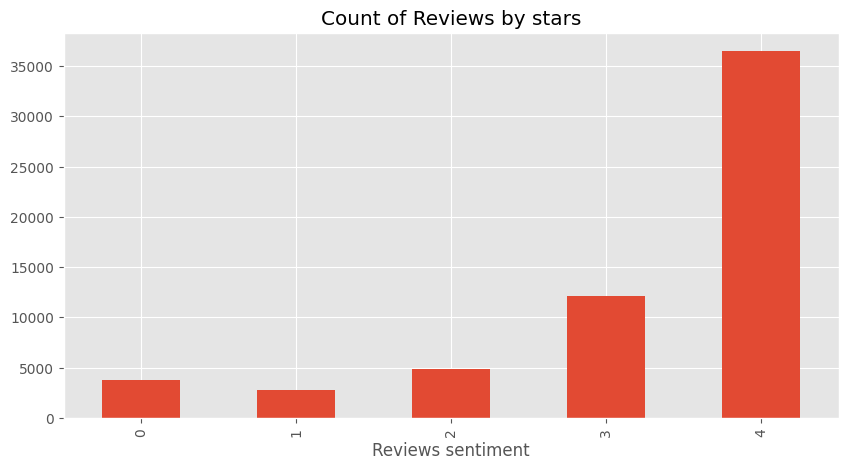

In [8]:
##Cheek data by sentiment
ax = df['overall'].value_counts().sort_index()\
        .plot(kind='bar',
        title='Count of Reviews by stars',
        figsize=(10,5))

ax.set_xlabel("Reviews sentiment")
plt.show()

In [9]:
# Reducing the dataset of positive reviews to 2500
# Assume your DataFrame is named df and the column with sentiment labels is named 'sentiment'

# Splitting the dataset by sentiment classes

positive_reviews_5 = df[df['overall'] == 4]
positive_reviews_4 = df[df['overall'] == 3]
neutral_reviews_3 = df[df['overall'] == 2]
neutral_reviews_2 = df[df['overall'] == 1]
negative_reviews_1 = df[df['overall'] == 0]

# educing the number of  reviews

positive_downsampled2 = positive_reviews_5.sample(n=3000, random_state=42)

positive_downsampled = positive_reviews_4.sample(n=3000, random_state=42)

neutral_reviews_3_downsampled = neutral_reviews_3.sample(n=4500, random_state=42)

negative_reviews_2_downsampled = neutral_reviews_2.sample(n=2500, random_state=42)

negative_reviews_1_downsampled = negative_reviews_1.sample(n=3000, random_state=42)

# Combining the downsampled positive reviews with neutral and negative reviews

balanced_df = pd.concat([negative_reviews_1_downsampled,negative_reviews_2_downsampled,neutral_reviews_3_downsampled,positive_downsampled,positive_downsampled2])

# Shuffling the data
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Checking the new distribution

print(balanced_df['overall'].value_counts())

overall
2    4500
0    3000
3    3000
4    3000
1    2500
Name: count, dtype: int64


In [10]:
count_class_2 = balanced_df[balanced_df['overall'] == 2].shape[0]
print(count_class_2)

4500


In [11]:
balanced_df.rename(columns={'overall': 'sentiment'}, inplace=True)

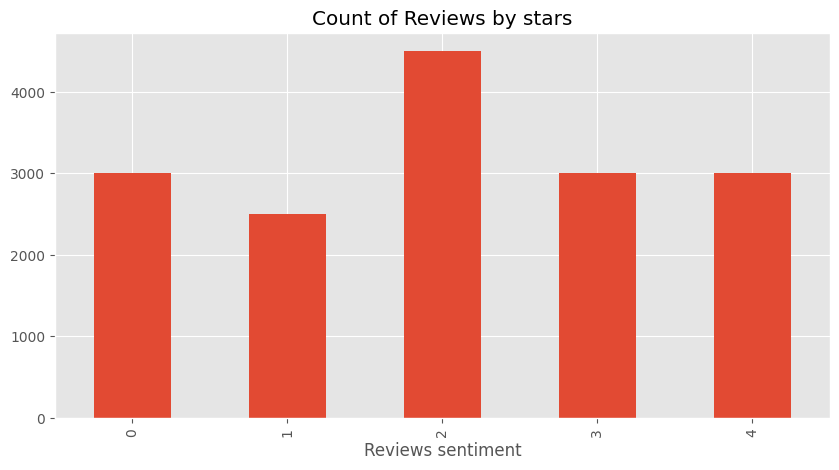

In [12]:
##Check new data by stars 
ax = balanced_df['sentiment'].value_counts().sort_index()\
        .plot(kind='bar',
        title='Count of Reviews by stars',
        figsize=(10,5))

ax.set_xlabel("Reviews sentiment")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
# Splitting data into training and testing samples
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['sentiment'])



In [14]:
import pandas as pd
from transformers import AutoTokenizer

# Assume train_df is your DataFrame and 'reviewText' is the column with text to be tokenized
# Removing rows with missing values in the 'reviewText' column
train_df = train_df.dropna(subset=['reviewText'])

# Ensuring all data in 'reviewText' is of string type
train_df['reviewText'] = train_df['reviewText'].astype(str)

# Loading the tokenizer for DistilBERT
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenizing the texts
tokens = tokenizer(train_df['reviewText'].tolist(), padding=True, truncation=True, return_tensors="pt")


In [15]:
import pandas as pd
from transformers import AutoTokenizer

# Assume test_df is your DataFrame and 'reviewText' is the column with text to be tokenized
# Removing rows with missing values in the 'reviewText' column
test_df = test_df.dropna(subset=['reviewText'])

# Ensuring all data in 'reviewText' is of string type

test_df['reviewText'] = test_df['reviewText'].astype(str)


# Loading the tokenizer for DistilBERT

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenizing the texts
tokens1 = tokenizer(test_df['reviewText'].tolist(), padding=True, truncation=True, return_tensors="pt")


In [16]:
print(tokens.keys())

dict_keys(['input_ids', 'attention_mask'])


In [17]:
if 820 in train_df.index:
    print(train_df.loc[820])
else:
    print("Check element with index.")

reviewText    Ok - I only get 5 pages for $11.99.  My DVB80 ...
sentiment                                                     0
Name: 820, dtype: object


In [18]:
print(len(train_df))


12800


In [19]:
from transformers import DistilBertForSequenceClassification
# Loading model DistilBERT for classifications
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
import torch

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# created Dataset for training nad test
train_dataset = MyDataset(tokens, train_df['sentiment'].tolist())
test_dataset = MyDataset(tokens1, test_df['sentiment'].tolist())


In [21]:
## Training parameters
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='./results',          # directory to save the model
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps
    weight_decay=0.01,               # weight decay for regularization
    logging_dir='./logs',            # directory for logs
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # your training dataset
    eval_dataset=test_dataset     # your evaluation dataset
)



comet_ml is installed but `COMET_API_KEY` is not set.


In [ ]:
trainer.train()

In [ ]:
model.save_pretrained('./your_model')

In [3]:
train_df = train_df.reset_index(drop=True)


NameError: name 'train_df' is not defined

In [4]:
train_df.reset_index(drop=True, inplace=True)


NameError: name 'train_df' is not defined

In [24]:
import torch

if torch.cuda.is_available():
    print("GPU is available.")
    print("Current CUDA device:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("GPU is not available, using CPU instead.")


GPU is available.
Current CUDA device: NVIDIA GeForce RTX 3050 Laptop GPU
